VISUALIZA EL COMPORTAMIENTO DE LOS ARCHIVOS CSV SELECCIONADOS

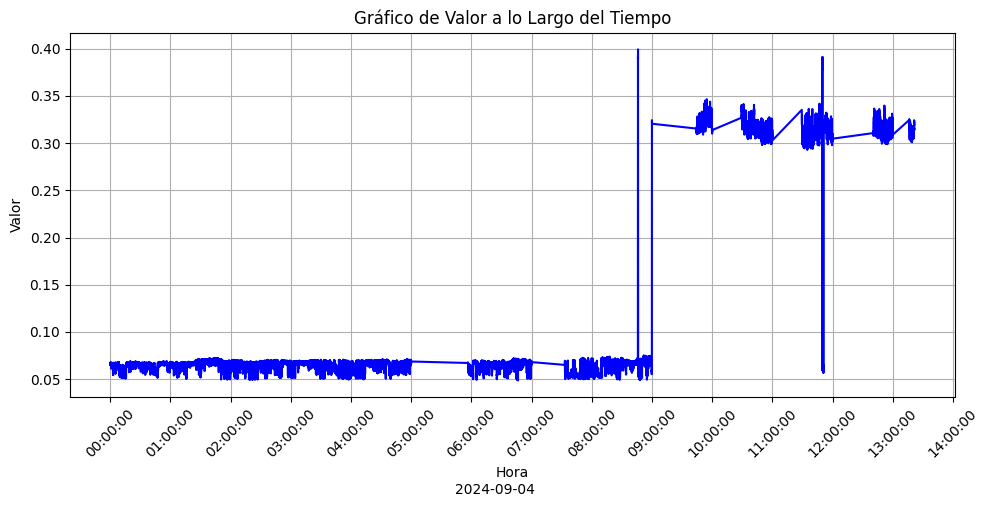

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ruta del archivo CSV
ruta_archivo = 'CARPETAS DE DATOS/2024-09-04/Corriente_Avg/archivo_concatenado.csv'  # Cambia esto por tu ruta

# Leer el archivo CSV
df = pd.read_csv(ruta_archivo)

# Convertir la columna 'fecha' a tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d_%H-%M-%S')

# Crear la gráfica
plt.figure(figsize=(10, 5))
plt.plot(df['fecha'], df['valor'], color='b', linestyle='-')  # Línea continua sin puntos

# Formato de fecha en el eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))  # Cambiar intervalo según necesidad

# Añadir títulos y etiquetas
plt.title('Gráfico de Valor a lo Largo del Tiempo')
plt.xlabel('Hora')
plt.ylabel('Valor')
plt.xticks(rotation=45)

# Mostrar solo los números de la fecha en el pie de la gráfica
fecha_unica = df['fecha'].dt.date.unique()
plt.figtext(0.5, 0.01, ' '.join([str(f) for f in fecha_unica]), ha='center', va='center', fontsize=10)

# Añadir una cuadrícula
plt.grid()

# Ajustar y mostrar la gráfica
plt.tight_layout()
plt.show()


C:\Users\PC R5\AppData\Local\Temp\ipykernel_15908\3503203405.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Tiempo'] = (df_filtrado['fecha'] - df_filtrado['fecha'].min()).dt.total_seconds()
C:\Users\PC R5\AppData\Local\Temp\ipykernel_15908\3503203405.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Tiempo'] = pd.to_timedelta(df_filtrado['Tiempo'], unit='s').astype(str).str.split(' ').str[-1]


TypeError: xlabel() missing 1 required positional argument: 'xlabel'

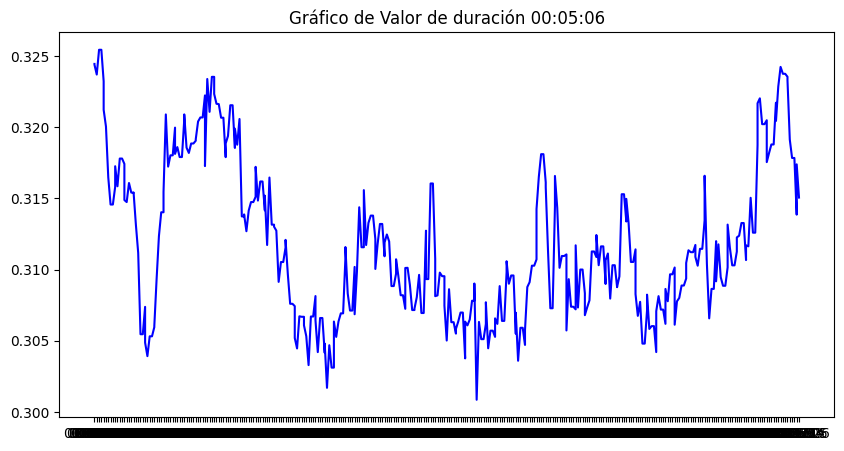

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV
ruta_archivo = 'CARPETAS DE DATOS/2024-09-04/Corriente_Avg/archivo_concatenado.csv'  # Cambia esto por tu ruta

# Leer el archivo CSV
df = pd.read_csv(ruta_archivo)

# Convertir la columna 'fecha' a tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d_%H-%M-%S')

# Definir el rango de fechas (ajusta según tus necesidades)
fecha_inicio = '2024-09-04 13:00:00'  # Cambia esta fecha
fecha_fin = '2024-09-04 14:00:00'      # Cambia esta fecha

# Filtrar los datos según el rango de fechas
df_filtrado = df[(df['fecha'] >= fecha_inicio) & (df['fecha'] <= fecha_fin)]

# Crear una nueva columna de 'Tiempo' como tiempo transcurrido desde el inicio
df_filtrado['Tiempo'] = (df_filtrado['fecha'] - df_filtrado['fecha'].min()).dt.total_seconds()
df_filtrado['Tiempo'] = pd.to_timedelta(df_filtrado['Tiempo'], unit='s').astype(str).str.split(' ').str[-1]

# Crear la gráfica
plt.figure(figsize=(10, 5))
plt.plot(df_filtrado['Tiempo'], df_filtrado['valor'], color='b', linestyle='-')  # Línea continua sin puntos

# Añadir títulos y etiquetas
plt.title(f'Gráfico de Valor de duración {df_filtrado["Tiempo"].iloc[-1]}')
plt.xlabel()
plt.ylabel('Valor')

# Configurar ticks en el eje X
num_ticks = 5  # Número de ticks a mostrar
plt.xticks(range(0, len(df_filtrado), max(1, len(df_filtrado)//num_ticks)), 
        df_filtrado['Tiempo'][::max(1, len(df_filtrado)//num_ticks)], rotation=45)

# Añadir el último valor centrado en el eje X
centro_x = (df_filtrado['Tiempo'].iloc[0], df_filtrado['Tiempo'].iloc[-1])
plt.annotate(df_filtrado['Tiempo'].iloc[-1], xy=(centro_x[1], 0), xytext=(0.5, -0.1),
        textcoords='axes fraction', ha='center', va='center', fontsize=10)

# Añadir una cuadrícula
plt.grid()

# Ajustar y mostrar la gráfica
plt.tight_layout()
plt.show()

# Guardar el DataFrame filtrado en un nuevo archivo CSV
nuevo_archivo_csv = 'CARPETAS DE DATOS/2024-09-04/Corriente_Avg/archivo_filtrado.csv'
df_filtrado[['Tiempo', 'valor']].to_csv(nuevo_archivo_csv, index=False)

print(f"Datos filtrados guardados como '{nuevo_archivo_csv}'.")
